<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson04_RDKit/lecture_note_colab_RDKit_no2_Descriptors%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.　ライブラリーのインストール

In [1]:
#ライブラリーのインストール
!pip install rdkit==2022.3.5
!pip install pubchempy

# 1. 1つの分子に対してDescriptorで数字を表示する。

In [2]:
# Descriptorsに入っているものがList形式になっている。
from rdkit.Chem import Descriptors
len(Descriptors.descList)

208

In [3]:
Descriptors.descList[:3]

[('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>)]

In [4]:
# 使用する化合物の名前
compound_name = "quercetine"

In [5]:
# 今回はpubchemで名前からsmilesに変換してRDKitのmolファイルに変換しています。
import pubchempy as pcp
pcp_compoud = pcp.get_compounds(compound_name, 'name')
compound_smiles = pcp_compoud[0].isomeric_smiles
compound_smiles

'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'

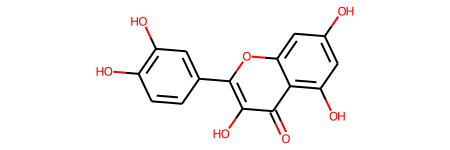

In [6]:
# RDKitで化合物をsmilesから読み込んで画面上に表示させます。

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

mol = Chem.MolFromSmiles(compound_smiles)
mol

In [7]:
#読み込んだ分子のMolLogPを出力します。
Descriptors.MolLogP(mol)

1.9880000000000009

In [8]:
#読み込んだ分子のqedを出力します。
Descriptors.qed(mol)

0.4341904402990982

# 2. 複数分子を読み込んだデータフレームにDescriptorを追加する。

In [9]:
from rdkit.Chem import AllChem, PandasTools

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,ROMol
0,354335558,

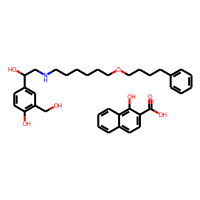

In [11]:
df = PandasTools.LoadSDF('/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf')
df = df[['ID','ROMol']]
df.head(1)

In [12]:
df["smiles"] = df["ROMol"].map(Chem.MolToSmiles)

,ID,ROMol,smiles,MolLogP,qed
116,87558032,,CC(=O)N1CCN(c2ccc(O)cc2)CC1,1.0607,0.769321

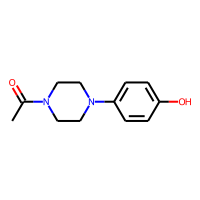

In [13]:
df["MolLogP"] = df["ROMol"].map(Descriptors.MolLogP)
df["qed"] = df["ROMol"].map(Descriptors.qed)
df.tail(1)

array([[<Axes: title={'center': 'MolLogP'}>]], dtype=object)

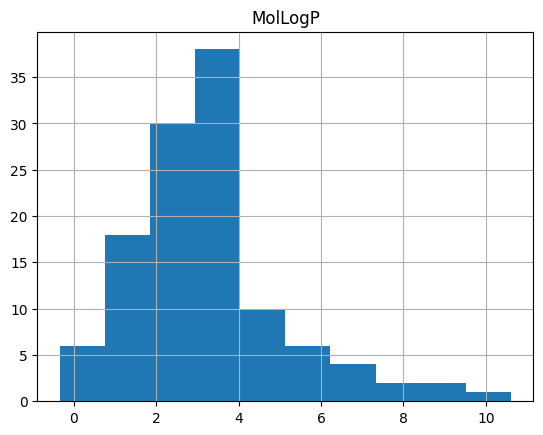

In [14]:
df.hist('MolLogP')

<Axes: xlabel='MolLogP', ylabel='qed'>

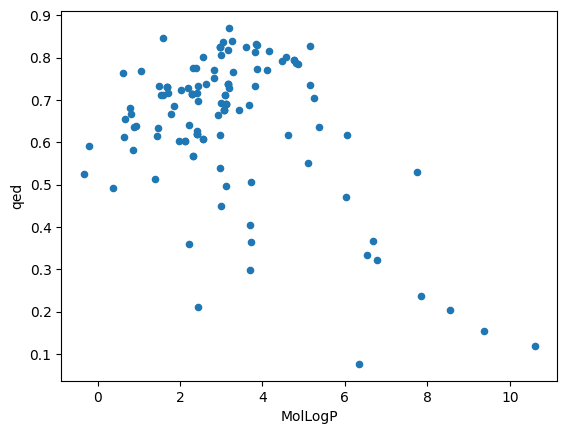

In [15]:
df.plot(kind='scatter', x='MolLogP', y='qed')

# 3. 複数分子を読み込んだデータフレームにDescriptorを全て追加する。

In [16]:
for i, j in Descriptors.descList:
    df[i] = df["ROMol"].map(j)

<ipython-input-16-44f6fa84814c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = df["ROMol"].map(j)
<ipython-input-16-44f6fa84814c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = df["ROMol"].map(j)
<ipython-input-16-44f6fa84814c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i

,ID,ROMol,smiles,MolLogP,qed,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,354335558,,O=C(O)c1ccc2ccccc2c1O.OCc1cc(C(O)CNCCCCCCOCCCC...,6.3510,0.076773,10.705447,-1.117358,10.705447,0.053308,603.756,...,0,0,0,0,0,0,0,0,10,0
1,354335473,,Oc1ccc(C(F)(F)F)cc1Cl,3.0644,0.676226,11.959304,-4.419306,11.959304,0.301088,196.555,...,0,0,0,0,0,0,0,0,0,0
2,354335166,,CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O.Cl.Cl,6.0228,0.471056,10.164167,0.000000,10.164167,0.000000,428.791,...,0,0,0,0,0,0,0,0,0,0
3,354334589,,CCCCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1,5.2463,0.703747,9.317572,0.381483,9.317572,0.381483,246.394,...,0,0,0,0,0,0,0,0,1,0
4,354334487,,Oc1c(Br)cc(Br)cc1/C=N/[C@H](c1ccccc1)[C@@H](c1...,7.8345,0.237704,10.621582,-0.157343,10.621582,0.032395,576.332,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,87558359,,CCC(C)(C)c1ccccc1O,3.0798,0.711796,9.577245,0.074745,9.577245,0.074745,164.248,...,0,0,0,0,0,0,0,0,0,0
113,87558322,,CCCCc1ccc(C=CC(=O)c2ccc(O)cc2)cc1,4.6309,0.618405,11.969142,-0.064760,11.969142,0.064760,280.367,...,0,0,0,0,0,0,0,0,0,0
114,87558311,,CCC(C)(C)c1ccc(O)c(C(C)(C)CC)c1,4.7674,0.795464,10.040125,0.031661,10.040125,0.031661,234.383,...,0,0,0,0,0,0,0,0,0,0
115,87558282,,Oc1ccccc1,1.3922,0.514730,8.632222,0.321759,8.632222,0.321759,94.113,...,0,0,0,0,0,0,0,0,0,0

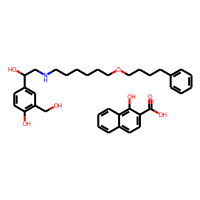
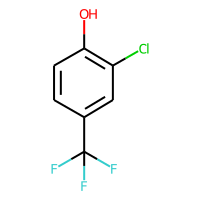
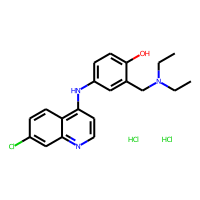
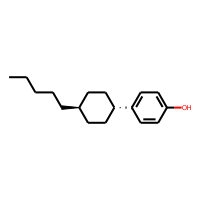
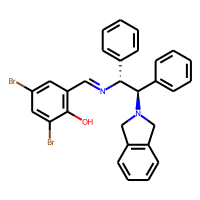
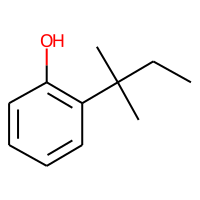
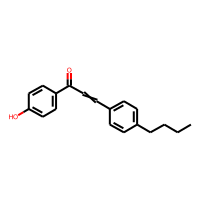
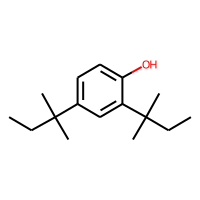
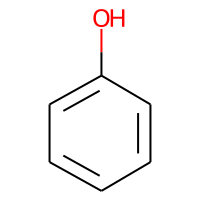
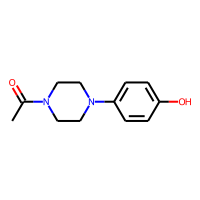

In [17]:
df

# 4. morganfingerprintを表示

In [18]:
help(AllChem.GetMorganFingerprintAsBitVect)

Help on built-in function GetMorganFingerprintAsBitVect in module rdkit.Chem.rdMolDescriptors:

GetMorganFingerprintAsBitVect(...)
    GetMorganFingerprintAsBitVect( (Mol)mol, (int)radius [, (int)nBits=2048 [, (AtomPairsParameters)invariants=[] [, (AtomPairsParameters)fromAtoms=[] [, (bool)useChirality=False [, (bool)useBondTypes=True [, (bool)useFeatures=False [, (AtomPairsParameters)bitInfo=None [, (bool)includeRedundantEnvironments=False]]]]]]]]) -> ExplicitBitVect :
        Returns a Morgan fingerprint for a molecule as a bit vector
    
        C++ signature :
            ExplicitBitVect* GetMorganFingerprintAsBitVect(RDKit::ROMol,unsigned int [,unsigned int=2048 [,boost::python::api::object=[] [,boost::python::api::object=[] [,bool=False [,bool=True [,bool=False [,boost::python::api::object=None [,bool=False]]]]]]]])



In [19]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

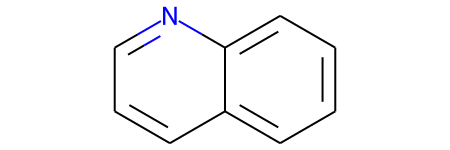

In [20]:
# 特定のsmilesを有する構造を表示してみる。
smiles = "c1c2ccc[nH0]c2ccc1"
compound = Chem.MolFromSmiles(smiles)
compound

In [21]:
bitI_morgan = {}
fp_morgan = AllChem.GetMorganFingerprintAsBitVect(compound, 2, bitInfo=bitI_morgan)
print(fp_morgan.GetNumBits(),fp_morgan.GetNumOnBits())
print(len(bitI_morgan))

2048 17
17


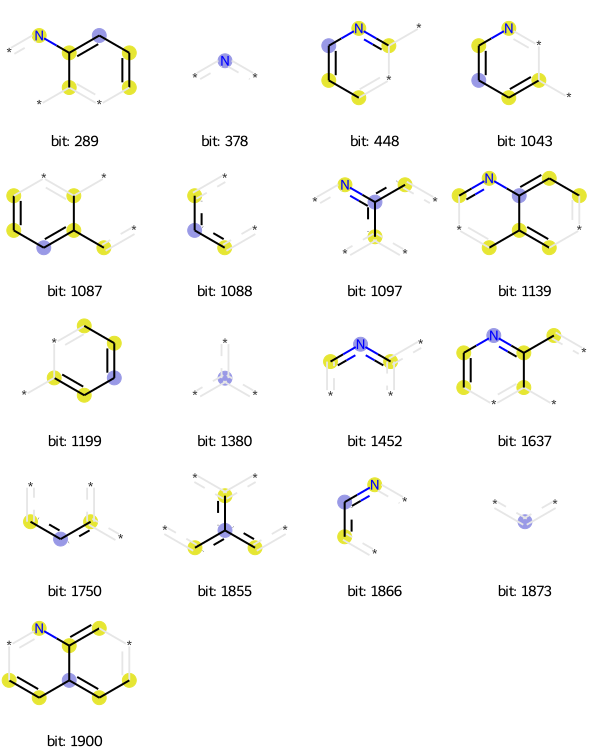

In [22]:
morgan_turples = ((compound , bit, bitI_morgan) for bit in list(bitI_morgan.keys()))
Draw.DrawMorganBits(morgan_turples, molsPerRow=4, legends=['bit: '+str(x) for x in list(bitI_morgan.keys())])

## 複数分子

In [23]:
import pandas as pd
import numpy as np

fingerprints = []
safe = []
for mol_idx, mol in enumerate(df["ROMol"]):
    try:
        #
        fingerprint = [x for x in AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)]
        fingerprints.append(fingerprint)
        safe.append(mol_idx)

    except:
        print("Error", mol_idx)
        continue
fingerprints = np.array(fingerprints)
print(fingerprints.shape)
df_fp = pd.DataFrame(fingerprints)

(117, 2048)


In [24]:
df_fp

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_fp['ID'] = df['ID']
df_fp['smiles'] = df['smiles']
df_fp.head()

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,ID,smiles
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,354335558,O=C(O)c1ccc2ccccc2c1O.OCc1cc(C(O)CNCCCCCCOCCCC...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,354335473,Oc1ccc(C(F)(F)F)cc1Cl
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,354335166,CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O.Cl.Cl
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,354334589,CCCCC[C@H]1CC[C@H](c2ccc(O)cc2)CC1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,354334487,Oc1c(Br)cc(Br)cc1/C=N/[C@H](c1ccccc1)[C@@H](c1...
